In [0]:
 import numpy as np
 import matplotlib.pyplot as plt
 import math

# Multi Armed Bandit 

Consistently choosing the best bandit machine required to maximize long term cumulative reward.

* Making use of epsilon greedy to explore potentially suboptimal choices

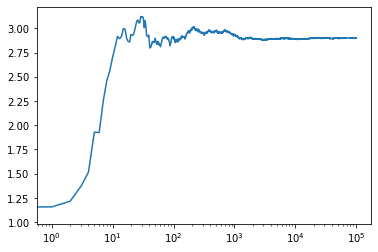

1.0004061841484186
1.9752843997407794
2.9997550032324067


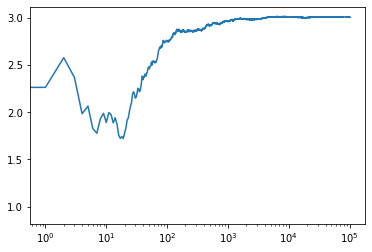

0.9557690423808278
2.077197561909524
3.0033756653212023


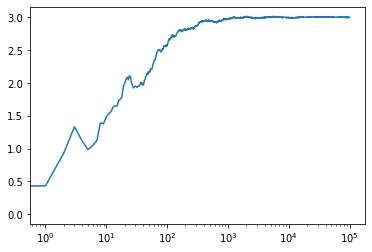

1.308255876095183
2.1649047621073882
2.9995581329115684


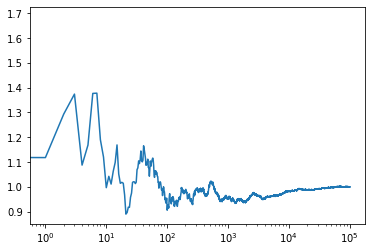

0.9987924820771961
0
0


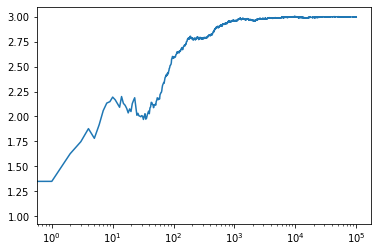

1.0984288027136244
2.236994362472361
2.998708150552909


C:\anaconda3\envs\AIDevEnv\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


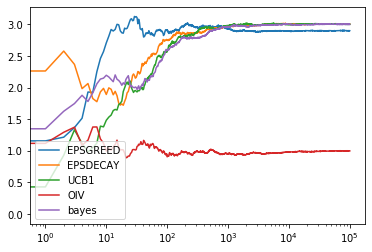

In [0]:
class bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m
  
  def update(self, x):
    self.N += 1
    self.mean = ((self.mean * (self.N - 1)) + x) / self.N
    # self.mean = ((1 - 1/self.N) * self.mean) + ((1/self.N) * x)

class Bayesian_Bandit:
  def __init__(self, m):
    self.m = m
    # Params for sampling from gaussian prior
    self.m0 = 0
    self.lambda0 = 1
    self.sum_x = 0
    self.tau = 1

  def pull(self):
    return np.random.randn() + self.m

  def sample(self):
    # Sample from a gaussian with mean m0 and precision of lambda0
    return np.random.randn() / np.sqrt(self.lambda0) + self.m0
  
  def update(self, x):
    self.lambda0 += 1
    self.sum_x += x
    self.m0 = self.tau*self.sum_x/self.lambda0

def run_experiment_bayesian(m1, m2, m3, eps, N):
  bandit_bois = [Bayesian_Bandit(m1), Bayesian_Bandit(m2), Bayesian_Bandit(m3)]
  data = np.empty(N)
  for i in range(N):
    j = np.argmax([bandit.sample() for bandit in bandit_bois])

    x = bandit_bois[j].pull()
    bandit_bois[j].update(x)

    data[i] = x

  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  plt.plot(cumulative_average)
  # plt.plot(np.ones(N) * m1)
  # plt.plot(np.ones(N) * m2)
  # plt.plot(np.ones(N) * m3)
  plt.xscale('log')
  plt.show()

  for b in bandit_bois:
    print(b.sample())

  return cumulative_average

def run_experiment(m1, m2, m3, eps, N):
  bandit_bois = [bandit(m1), bandit(m2), bandit(m3)]
  data = np.empty(N)
  for i in range(N):
    # Implement Epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([bandit.mean for bandit in bandit_bois])

    x = bandit_bois[j].pull()
    bandit_bois[j].update(x)

    data[i] = x

  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  plt.plot(cumulative_average)
  # plt.plot(np.ones(N) * m1)
  # plt.plot(np.ones(N) * m2)
  # plt.plot(np.ones(N) * m3)
  plt.xscale('log')
  plt.show()

  for b in bandit_bois:
    print(b.mean)

  return cumulative_average

def run_experiment_epsDecay(m1, m2, m3, eps, N):
  bandit_bois = [bandit(m1), bandit(m2), bandit(m3)]
  data = np.empty(N)
  for i in range(N):
    # Implement Epsilon greedy
    p = np.random.random()
    if p < 1.0/(i + 1):
      j = np.random.choice(3)
    else:
      j = np.argmax([bandit.mean for bandit in bandit_bois])

    x = bandit_bois[j].pull()
    bandit_bois[j].update(x)

    data[i] = x


  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  plt.plot(cumulative_average)
  # plt.plot(np.ones(N) * m1)
  # plt.plot(np.ones(N) * m2)
  # plt.plot(np.ones(N) * m3)
  plt.xscale('log')
  plt.show()

  for b in bandit_bois:
    print(b.mean)

  return cumulative_average

def run_experiment_OptimisticInitialValues(m1, m2, m3, eps, N):
  bandit_bois = [bandit(m1), bandit(m2), bandit(m3)]
  data = np.empty(N)

  for i in range(0, N):

    j = np.argmax([bandit.mean for bandit in bandit_bois])

    x = bandit_bois[j].pull()
    bandit_bois[j].update(x)

    data[i] = x

  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  plt.plot(cumulative_average)
  # plt.plot(np.ones(N) * m1)
  # plt.plot(np.ones(N) * m2)
  # plt.plot(np.ones(N) * m3)
  plt.xscale('log')
  plt.show()

  for b in bandit_bois:
    print(b.mean)

  return cumulative_average

def run_experiment_UCB1(m1, m2, m3, eps, N):
  bandit_bois = [bandit(m1), bandit(m2), bandit(m3)]
  data = np.empty(N)

  bandit_j = [1, 1, 1]

  for i in range(1, N):

    bandit_means = [bandit.mean for bandit in bandit_bois]

    j_candidates = []
    for k in range(3):
      j_candidates.append(bandit_means[k] + math.sqrt(2*math.log(i)/bandit_j[k]))

    j = np.argmax(j_candidates)

    x = bandit_bois[j].pull()
    bandit_bois[j].update(x)

    bandit_j[j] = bandit_j[j] + 1

    data[i] = x

  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  plt.plot(cumulative_average)
  # plt.plot(np.ones(N) * m1)
  # plt.plot(np.ones(N) * m2)
  # plt.plot(np.ones(N) * m3)
  plt.xscale('log')
  plt.show()

  for b in bandit_bois:
    print(b.mean)

  return cumulative_average

c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
c_1_decay = run_experiment_epsDecay(1.0, 2.0, 3.0, 0.1, 100000)
c_1_UCB = run_experiment_UCB1(1.0, 2.0, 3.0, 0.1, 100000)
c_1_OIV = run_experiment_OptimisticInitialValues(1.0, 2.0, 3.0, 0.1, 100000)
c_1_bayes = run_experiment_bayesian(1.0, 2.0, 3.0, 0.1, 100000)
# c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
# c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

# plt.plot(c_1, label='eps=0.1')
# plt.plot(c_05, label='eps=0.05')
# plt.plot(c_01, label='eps=0.01')
# plt.legend()
# plt.show()

plt.plot(c_1, label='EPSGREED')
plt.plot(c_1_decay, label='EPSDECAY')
plt.plot(c_1_UCB, label='UCB1')
plt.plot(c_1_OIV, label='OIV')
plt.plot(c_1_bayes, label='bayes')
plt.xscale('log')
plt.legend()
plt.show()

In [0]:
np.random.randn()

0.49807773675545647

# 2: Bayesian Bandit